In [1101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

In [1102]:
# product table 가져오기
base_path = os.getcwd()
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,brand
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,turtle
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,peter
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,titan
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,manchester
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,puma


In [1103]:
# click_stream_new table
click_stream_new = pd.read_csv(base_path + '/click_stream_final.csv')
click_stream_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ GB


In [1104]:
# customer table
customer = pd.read_csv(base_path + '/customer_final.csv', usecols = ['customer_id', 'gender', 'birthdate', 'home_location', 'first_join_date'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   home_location    100000 non-null  object
 4   first_join_date  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1105]:
# transaction_new
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1254585 non-null  object 
 1   customer_id     1254585 non-null  int64  
 2   booking_id      1254585 non-null  object 
 3   session_id      1254585 non-null  object 
 4   payment_method  1254585 non-null  object 
 5   payment_status  1254585 non-null  int64  
 6   promo_amount    1254585 non-null  int64  
 7   promo_code      1254585 non-null  float64
 8   shipment_fee    1254585 non-null  int64  
 9   total_amount    1254585 non-null  int64  
 10  product_id      1254585 non-null  int64  
 11  quantity        1254585 non-null  int64  
 12  item_price      1254585 non-null  int64  
 13  with_promo      1254585 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 134.0+ MB


# 1. 브랜드 관련 EDA

In [1106]:
product.brand.value_counts()

nike                                            2288
puma                                            2092
adidas                                          2079
united                                          1401
fabindia                                         750
catwalk                                          743
gini                                             721
arrow                                            700
fastrack                                         688
wrangler                                         684
lino                                             654
baggit                                           622
red                                              550
lee                                              521
myntra                                           473
fila                                             472
scullers                                         455
french                                           430
jealous                                       

#### 2021년 인도네시아 18세 ~ 55세 설문조사 결과를 토대로 인기있는 상위 10개 브랜드가 이커머스에 입점되어 있는지 확인 

In [1107]:
# 이커머스 회사의 고객 타겟층인 18세에서 35세와 다소 차이가 있을 수 있으나, 참고 목적으로 살펴볼 예정
    # 출처 : https://welcon.kocca.kr/cmm/fms/CrawlingFileDown.do?atchFileId=FILE_f016d5ef-6951-4e09-9cf0-8f513a360671&fileSn=1
brand = product.brand.dropna()
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', len(brand[brand.str.contains(famous_brand)]))

adidas : 2079
h&m : 0
converse : 169
uniqlo : 0
nike : 2288
eiger : 0
3second : 0
nevada : 0
vans : 196
cardinal : 0


In [1108]:
# 문제점 : 인도네시아에서 인기있는 브랜드인 adidas, nike를 제외하고 입점이 안되어있거나 제품 수가 매우 적음

# 2. 검색어 관련 EDA (추후 진행)

In [1109]:
# 검색 키워드 유니크 값
click_stream_new.search_keywords.unique()

array([nan, 'Dress', "Woman's Bag", 'Trousers', 'Shirts', 'Shoes',
       'Work Bag', 'T-Shirt', 'Hat', 'Second Hand', 'Nike Shoes',
       'Adidas Shoes', 'Time', 'Sandal', 'House dress', 'Pajamas'],
      dtype=object)

In [1110]:
# 검색 키워드가 NaN 값이 아닌 데이터: 1173266
len(click_stream_new) - click_stream_new.search_keywords.isnull().sum()

1173266

In [1111]:
# SEARCH라는 이벤트가 있을때만 검색 키워드 존재
click_stream_new.groupby(['search_keywords', 'event_name']).count()

,,session_id,event_time,traffic_source,product_id,quantity,item_price,payment_status,promo_code,promo_amount
search_keywords,event_name,,,,,,,,,
Adidas Shoes,SEARCH,25627,25627,25627,0,25627,25627,0,25627,25627
Dress,SEARCH,333023,333023,333023,0,333023,333023,0,333023,333023
Hat,SEARCH,4844,4844,4844,0,4844,4844,0,4844,4844
House dress,SEARCH,1197,1197,1197,0,1197,1197,0,1197,1197
Nike Shoes,SEARCH,51578,51578,51578,0,51578,51578,0,51578,51578
Pajamas,SEARCH,2268,2268,2268,0,2268,2268,0,2268,2268
Sandal,SEARCH,12787,12787,12787,0,12787,12787,0,12787,12787
Second Hand,SEARCH,224882,224882,224882,0,224882,224882,0,224882,224882
Shirts,SEARCH,167632,167632,167632,0,167632,167632,0,167632,167632


In [1112]:
click_stream_new.columns

Index(['session_id', 'event_name', 'event_time', 'traffic_source',
       'product_id', 'quantity', 'item_price', 'payment_status',
       'search_keywords', 'promo_code', 'promo_amount'],
      dtype='object')

In [1113]:
# 검색을 많이 한 순서대로 정렬
click_stream_new['search_keywords'].value_counts()

Dress           333023
Second Hand     224882
Shirts          167632
Woman's Bag     128790
T-Shirt         107184
Nike Shoes       51578
Trousers         39748
Work Bag         38677
Shoes            28029
Adidas Shoes     25627
Sandal           12787
Time              7000
Hat               4844
Pajamas           2268
House dress       1197
Name: search_keywords, dtype: int64

In [1117]:
# 번역한 데이터를 바탕으로 키워드 순위 재구성 

# -> 1. 드레스에 대한 수요가 많음
# -> 2. 중고상품에 대한 수요가 많음
# -> 3. Nike, Adidas 신발 수요 많음
# -> 4. Time에 대한 검색 수요가 있음(..?)

In [1118]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2019-09
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2019-09
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2019-09
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,MOBILE,15315.0,4,313529,NaN,NaN,0.0,0,2019-09
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0,2019-09


In [1124]:
# 2016~2022년까지 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율

# 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율 정보 데이터프레임
temp_click_stream_new = click_stream_new[click_stream_new['search_keywords'].notnull()].groupby('month')['session_id'].count()
temp_click_stream_new = pd.DataFrame(data=temp_click_stream_new).reset_index()
temp_click_stream_new['month'] = temp_click_stream_new['month'].astype('str')

temp_secondhand = click_stream_new[click_stream_new['search_keywords'] == 'Second Hand'].groupby('month')['session_id'].count()
temp_secondhand = pd.DataFrame(data=temp_secondhand).reset_index()
temp_secondhand['month'] = temp_click_stream_new['month'].astype('str')

temp_click_stream_new = pd.merge(temp_click_stream_new, temp_secondhand, how='inner', on='month')
temp_click_stream_new.columns = ['month', 'total_count', 'second_hand_count']

temp_click_stream_new['ratio_second_hand'] = round((temp_click_stream_new['second_hand_count'] / temp_click_stream_new['total_count']) * 100, 2)
temp_click_stream_new.head()

,month,total_count,second_hand_count,ratio_second_hand
0,2016-07,341,60,17.60
1,2016-08,700,116,16.57
2,2016-09,985,191,19.39
3,2016-10,1269,258,20.33
4,2016-11,1562,300,19.21


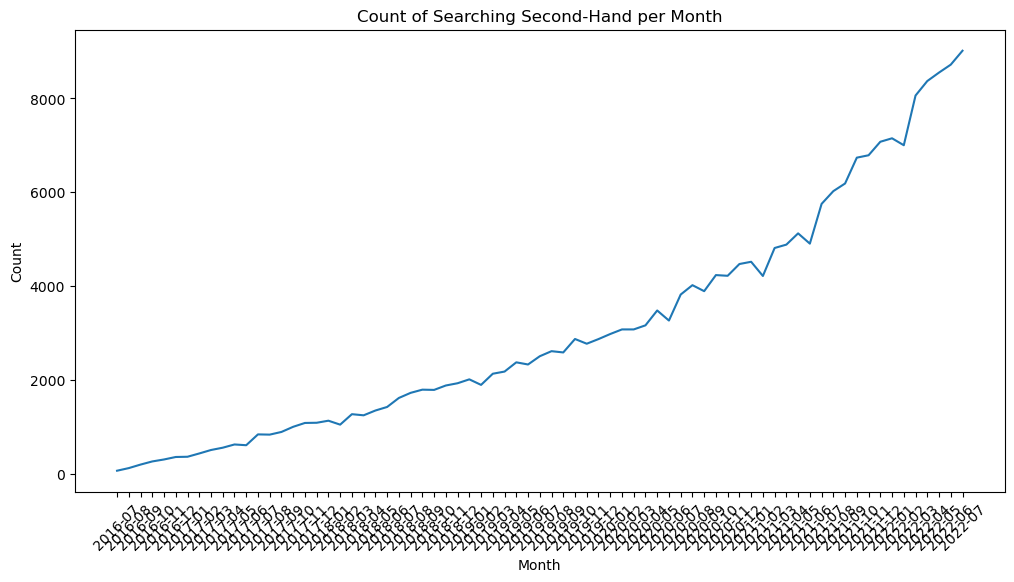

In [1125]:
# 월별로 중고 검색 횟수 모아보기
plt.figure(figsize=(12, 6))
ax = sns.lineplot(temp_click_stream_new, x='month', y='second_hand_count')
# ax2 = ax.twinx()
# ax2 = sns.barplot(temp_click_stream_new, x='month', y='ratio_second_hand', ax=ax2)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Searching Second-Hand per Month')
plt.xticks(rotation=45)
plt.show()

##### 구매로 이어진(구매시도까지 이어진) 검색어 탐색

In [1127]:
click_stream_new = click_stream_new.sort_values(by='event_time')

In [1128]:
click_stream_new.payment_status.unique()

array([nan,  1.,  0.])

In [1129]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
12371556,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2016-06-30 22:59:36.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371559,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:01:06.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371557,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2016-06-30 23:01:14.254358+00:00,MOBILE,33314.0,3,210265,NaN,NaN,0.0,0,2016-06
12371560,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2016-06-30 23:02:35.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371561,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:03:56.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06


In [1130]:
# 추후 session 정보가 생기면 더 자세하게 진행
print(f'session_id 유니크값: {click_stream_new.session_id.nunique()}')

print(f"session_id 값들 중 검색을 한 session_id 수: {click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()}")

print(f"session_id 중 검색이 포함된 session_id 비율: {round(click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()/click_stream_new.session_id.nunique() * 100, 2)}%")
num_search = len(click_stream_new[click_stream_new['event_name'] == 'SEARCH'])

print(f'검색 횟수: {num_search}')

session_id 유니크값: 895203
session_id 값들 중 검색을 한 session_id 수: 490846
session_id 중 검색이 포함된 session_id 비율: 54.83%
검색 횟수: 1173266


In [1131]:
# T-Shirt -> Tshirts(articleType)
# Shoes, Adidas Shoes, Nike Shoes -> Shoes
# Woman's Bag, Work Bag -> Bags
# Dress -> Dress
# Sandal -> Sandas
# Shirts -> shirts
# Trousers -> trousers(articleType)
# Pajamas, House Dress -> Loungewear and Nightwear
# Hat -> Hat(articleType)

In [1132]:
# click_trans_df = pd.merge(click_stream_new, transaction_df[['session_id', 'event_time', 'product_id']], how='left', on=['session_id', 'event_time'])
# x = click_trans_df.product_id_x
# y = click_trans_df.product_id_y
# z = x.fillna(0)+y.fillna(0)
# z = z.replace(0, np.nan)

# click_trans_df.product_id_x = z
# click_trans_df.rename(columns={'product_id_x':'product_id'}, inplace=True)
# click_trans_df.drop('product_id_y', axis=1, inplace=True)
# click_trans_df.head()

In [1133]:
# cnt = 0

# temp = click_stream_new[click_stream_new.session_id == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].reset_index(drop=True)
# search_idx = temp[temp['event_name'] == 'SEARCH'].index
# # search_dict = {idx:temp.loc[idx]['search_keywords'] for idx in search_idx}
# trans_idx = temp[(temp['event_name'] == 'ADD_TO_CART') | (temp['event_name'] == 'BOOKING')].index

# for i in search_idx:
#     filtered_idx = trans_idx[trans_idx > i]
#     filtered_ = [temp.iloc[i] for i in filtered_idx]
#     if temp.iloc[i] in filtered_:
#         cnt += 1


# 3. 회원가입 후 첫 구매까지의 기간 분석